In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel("Banglore.xlsx")
df2 = pd.read_excel("chennai_df.xlsx")
df3 = pd.read_excel("jaipur_df.xlsx")
df4 = pd.read_excel("hyderabad_df.xlsx")
df5 = pd.read_excel("kolkata_df.xlsx")
df6 = pd.read_excel("delhi_df.xlsx")

In [3]:
df = df = pd.concat([df1, df2, df3, df4, df5, df6], axis=0, ignore_index=False)

In [4]:
df

,Unnamed: 0,bt,km,transmission,oem,model,modelYear,price,Fuel Type,Insurance Validity,Ownership,Mileage,Seats,city
0,0.0,Hatchback,"1,20,000",Manual,Maruti,Maruti Celerio,2015,₹ 4 Lakh,Petrol,Third Party insurance,Third Owner,23.1 kmpl,5.0,Banglore
1,1.0,SUV,"32,706",Manual,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,Petrol,Comprehensive,Second Owner,17 kmpl,5.0,Banglore
2,2.0,Hatchback,"11,949",Manual,Tata,Tata Tiago,2018,₹ 5.85 Lakh,Petrol,Comprehensive,First Owner,23.84 kmpl,5.0,Banglore
3,3.0,Sedan,"17,794",Manual,Hyundai,Hyundai Xcent,2014,₹ 4.62 Lakh,Petrol,Comprehensive,First Owner,19.1 kmpl,5.0,Banglore
4,4.0,SUV,"60,000",Manual,Maruti,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,Diesel,Third Party insurance,First Owner,23.65 kmpl,5.0,Banglore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,NaN,Sedan,"60,000",Automatic,Honda,Honda City,2019,₹ 9 Lakh,Petrol,Third Party insurance,First Owner,18 kmpl,5.0,delhi
1481,NaN,SUV,"20,000",Manual,Kia,Kia Sonet,2021,₹ 9.50 Lakh,Petrol,Third Party insurance,First Owner,18.4 kmpl,5.0,delhi
1482,NaN,Sedan,"60,000",Manual,Hyundai,Hyundai Verna,2011,₹ 4.18 Lakh,Petrol,Third Party insurance,First Owner,17.01 kmpl,5.0,delhi
1483,NaN,SUV,"38,000",Manual,Hyundai,Hyundai Creta,2019,₹ 11.95 Lakh,Diesel,Third Party insurance,First Owner,20.5 kmpl,5.0,delhi


In [5]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')


In [6]:
df

,bt,km,transmission,oem,model,modelYear,price,Fuel Type,Insurance Validity,Ownership,Mileage,Seats,city
0,Hatchback,"1,20,000",Manual,Maruti,Maruti Celerio,2015,₹ 4 Lakh,Petrol,Third Party insurance,Third Owner,23.1 kmpl,5.0,Banglore
1,SUV,"32,706",Manual,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,Petrol,Comprehensive,Second Owner,17 kmpl,5.0,Banglore
2,Hatchback,"11,949",Manual,Tata,Tata Tiago,2018,₹ 5.85 Lakh,Petrol,Comprehensive,First Owner,23.84 kmpl,5.0,Banglore
3,Sedan,"17,794",Manual,Hyundai,Hyundai Xcent,2014,₹ 4.62 Lakh,Petrol,Comprehensive,First Owner,19.1 kmpl,5.0,Banglore
4,SUV,"60,000",Manual,Maruti,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,Diesel,Third Party insurance,First Owner,23.65 kmpl,5.0,Banglore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Sedan,"60,000",Automatic,Honda,Honda City,2019,₹ 9 Lakh,Petrol,Third Party insurance,First Owner,18 kmpl,5.0,delhi
1481,SUV,"20,000",Manual,Kia,Kia Sonet,2021,₹ 9.50 Lakh,Petrol,Third Party insurance,First Owner,18.4 kmpl,5.0,delhi
1482,Sedan,"60,000",Manual,Hyundai,Hyundai Verna,2011,₹ 4.18 Lakh,Petrol,Third Party insurance,First Owner,17.01 kmpl,5.0,delhi
1483,SUV,"38,000",Manual,Hyundai,Hyundai Creta,2019,₹ 11.95 Lakh,Diesel,Third Party insurance,First Owner,20.5 kmpl,5.0,delhi


# Standardising data

In [7]:
import numpy as np
import pandas as pd

# Remove commas in 'km'
df["km"] = df['km'].astype(str).str.replace(',', '').replace(['--', 'NA', ''], np.nan)
df['km'] = pd.to_numeric(df['km'], errors='coerce')

# Remove spaces in 'model'
df["model"] = df["model"].astype(str).str.strip()

# Remove ₹ symbol in 'price'
df["price"] = df['price'].astype(str).str.replace('₹', '').str.strip()

# Create a numeric column
df['price_num'] = np.nan

# Convert prices with 'Lakh'
mask_lakh = df['price'].str.contains('Lakh', na=False)
price_lakh = df.loc[mask_lakh, 'price'].str.replace('Lakh', '', regex=False).astype(float) * 1_00_000
df.loc[mask_lakh, 'price_num'] = price_lakh

# Convert prices with 'Crore'
mask_crore = df['price'].str.contains('Crore', na=False)
price_crore = df.loc[mask_crore, 'price'].str.replace('Crore', '', regex=False).astype(float) * 1_00_00_000
df.loc[mask_crore, 'price_num'] = price_crore

# If any rows left that don’t contain 'Lakh' or 'Crore', assume they are raw numbers
mask_numeric = ~(mask_lakh | mask_crore)
df.loc[mask_numeric, 'price_num'] = pd.to_numeric(df.loc[mask_numeric, 'price'], errors='coerce')

# Clean Mileage
df['Mileage'] = df['Mileage'].astype(str).str.replace('kmpl', '', regex=False).str.strip()
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Mileage'] = df['Mileage'].round().astype('Int64')

# Strip spaces for text columns
cols_to_strip = ['city', 'bt', 'transmission', 'Fuel Type']
for col in cols_to_strip:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

print(df.info())
print(df[['price', 'price_num']].head())


<class 'pandas.core.frame.DataFrame'>
Index: 8369 entries, 0 to 1484
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bt                  8369 non-null   object 
 1   km                  8369 non-null   int64  
 2   transmission        8369 non-null   object 
 3   oem                 8369 non-null   object 
 4   model               8369 non-null   object 
 5   modelYear           8369 non-null   int64  
 6   price               8369 non-null   object 
 7   Fuel Type           8369 non-null   object 
 8   Insurance Validity  8365 non-null   object 
 9   Ownership           8337 non-null   object 
 10  Mileage             8046 non-null   Int64  
 11  Seats               8363 non-null   float64
 12  city                8369 non-null   object 
 13  price_num           8259 non-null   float64
dtypes: Int64(1), float64(2), int64(2), object(9)
memory usage: 988.9+ KB
None
       price  price_num
0     4 Lak

In [8]:
df

,bt,km,transmission,oem,model,modelYear,price,Fuel Type,Insurance Validity,Ownership,Mileage,Seats,city,price_num
0,Hatchback,120000,Manual,Maruti,Maruti Celerio,2015,4 Lakh,Petrol,Third Party insurance,Third Owner,23,5.0,Banglore,400000.0
1,SUV,32706,Manual,Ford,Ford Ecosport,2018,8.11 Lakh,Petrol,Comprehensive,Second Owner,17,5.0,Banglore,811000.0
2,Hatchback,11949,Manual,Tata,Tata Tiago,2018,5.85 Lakh,Petrol,Comprehensive,First Owner,24,5.0,Banglore,585000.0
3,Sedan,17794,Manual,Hyundai,Hyundai Xcent,2014,4.62 Lakh,Petrol,Comprehensive,First Owner,19,5.0,Banglore,462000.0
4,SUV,60000,Manual,Maruti,Maruti SX4 S Cross,2015,7.90 Lakh,Diesel,Third Party insurance,First Owner,24,5.0,Banglore,790000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Sedan,60000,Automatic,Honda,Honda City,2019,9 Lakh,Petrol,Third Party insurance,First Owner,18,5.0,delhi,900000.0
1481,SUV,20000,Manual,Kia,Kia Sonet,2021,9.50 Lakh,Petrol,Third Party insurance,First Owner,18,5.0,delhi,950000.0
1482,Sedan,60000,Manual,Hyundai,Hyundai Verna,2011,4.18 Lakh,Petrol,Third Party insurance,First Owner,17,5.0,delhi,418000.0
1483,SUV,38000,Manual,Hyundai,Hyundai Creta,2019,11.95 Lakh,Diesel,Third Party insurance,First Owner,20,5.0,delhi,1195000.0


In [9]:
# Drop the old 'price' column and rename 'price_num' to 'price'
df = df.drop(columns=['price']).rename(columns={'price_num': 'price'})


In [10]:
df

,bt,km,transmission,oem,model,modelYear,Fuel Type,Insurance Validity,Ownership,Mileage,Seats,city,price
0,Hatchback,120000,Manual,Maruti,Maruti Celerio,2015,Petrol,Third Party insurance,Third Owner,23,5.0,Banglore,400000.0
1,SUV,32706,Manual,Ford,Ford Ecosport,2018,Petrol,Comprehensive,Second Owner,17,5.0,Banglore,811000.0
2,Hatchback,11949,Manual,Tata,Tata Tiago,2018,Petrol,Comprehensive,First Owner,24,5.0,Banglore,585000.0
3,Sedan,17794,Manual,Hyundai,Hyundai Xcent,2014,Petrol,Comprehensive,First Owner,19,5.0,Banglore,462000.0
4,SUV,60000,Manual,Maruti,Maruti SX4 S Cross,2015,Diesel,Third Party insurance,First Owner,24,5.0,Banglore,790000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Sedan,60000,Automatic,Honda,Honda City,2019,Petrol,Third Party insurance,First Owner,18,5.0,delhi,900000.0
1481,SUV,20000,Manual,Kia,Kia Sonet,2021,Petrol,Third Party insurance,First Owner,18,5.0,delhi,950000.0
1482,Sedan,60000,Manual,Hyundai,Hyundai Verna,2011,Petrol,Third Party insurance,First Owner,17,5.0,delhi,418000.0
1483,SUV,38000,Manual,Hyundai,Hyundai Creta,2019,Diesel,Third Party insurance,First Owner,20,5.0,delhi,1195000.0


In [11]:
df.to_excel("cardheko.xlsx", index = False)

In [12]:
df = pd.read_excel("cardheko.xlsx")

In [13]:
df

,bt,km,transmission,oem,model,modelYear,Fuel Type,Insurance Validity,Ownership,Mileage,Seats,city,price
0,Hatchback,120000,Manual,Maruti,Maruti Celerio,2015,Petrol,Third Party insurance,Third Owner,23.0,5.0,Banglore,400000.0
1,SUV,32706,Manual,Ford,Ford Ecosport,2018,Petrol,Comprehensive,Second Owner,17.0,5.0,Banglore,811000.0
2,Hatchback,11949,Manual,Tata,Tata Tiago,2018,Petrol,Comprehensive,First Owner,24.0,5.0,Banglore,585000.0
3,Sedan,17794,Manual,Hyundai,Hyundai Xcent,2014,Petrol,Comprehensive,First Owner,19.0,5.0,Banglore,462000.0
4,SUV,60000,Manual,Maruti,Maruti SX4 S Cross,2015,Diesel,Third Party insurance,First Owner,24.0,5.0,Banglore,790000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Sedan,60000,Automatic,Honda,Honda City,2019,Petrol,Third Party insurance,First Owner,18.0,5.0,delhi,900000.0
8365,SUV,20000,Manual,Kia,Kia Sonet,2021,Petrol,Third Party insurance,First Owner,18.0,5.0,delhi,950000.0
8366,Sedan,60000,Manual,Hyundai,Hyundai Verna,2011,Petrol,Third Party insurance,First Owner,17.0,5.0,delhi,418000.0
8367,SUV,38000,Manual,Hyundai,Hyundai Creta,2019,Diesel,Third Party insurance,First Owner,20.0,5.0,delhi,1195000.0


In [14]:
df.isnull().sum()

bt                      4
km                      0
transmission            0
oem                     0
model                   0
modelYear               0
Fuel Type               0
Insurance Validity      4
Ownership              32
Mileage               323
Seats                   6
city                    0
price                 110
dtype: int64

# Histogram

In [15]:
# Mileage
print("Mean:", df['Mileage'].mean())
print("Median:", df['Mileage'].median())
print("Skewness:", df['Mileage'].skew())

Mean: 19.200472284364903
Median: 19.0
Skewness: 5.0307514954502


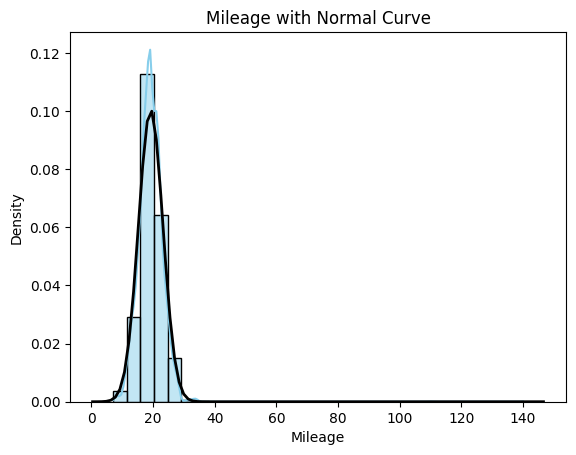

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop NA values
data = df['Mileage'].dropna()

# Plot histogram
sns.histplot(data, bins=30, kde=True, stat='density', color='skyblue', edgecolor='black')

# Overlay normal curve
from scipy.stats import norm

mu, std = data.mean(), data.std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
plt.title("Mileage with Normal Curve")
plt.show()

In [17]:
# Seats
print("Mean:", df['Seats'].mean())
print("Median:", df['Seats'].median())
print("Skewness:", df['Seats'].skew())

Mean: 5.203276336242975
Median: 5.0
Skewness: 2.5892121014676017


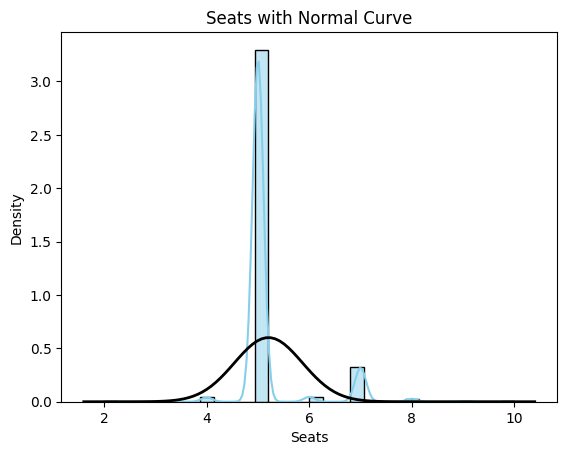

In [18]:
# Drop NA values
data = df['Seats'].dropna()

# Plot histogram
sns.histplot(data, bins=30, kde=True, stat='density', color='skyblue', edgecolor='black')

mu, std = data.mean(), data.std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
plt.title("Seats with Normal Curve")
plt.show()

In [19]:
# price
print("Mean:", df['price'].mean())
print("Median:", df['price'].median())
print("Skewness:", df['price'].skew())


Mean: 968756.8712919239
Median: 613000.0
Skewness: 9.996025131648393


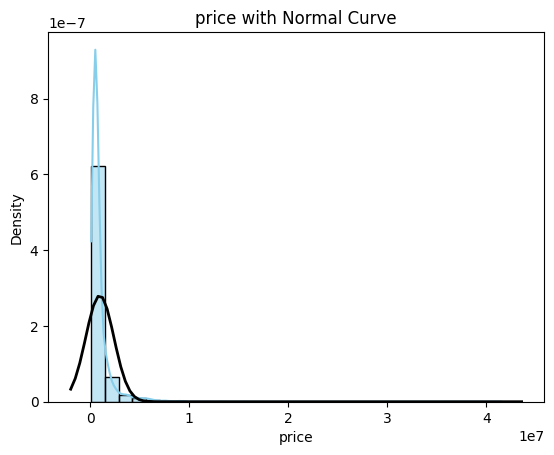

In [20]:
# Drop NA values
data = df['price'].dropna()

# Plot histogram
sns.histplot(data, bins=30, kde=True, stat='density', color='skyblue', edgecolor='black')

mu, std = data.mean(), data.std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
plt.title("price with Normal Curve")
plt.show()

# Categorical column

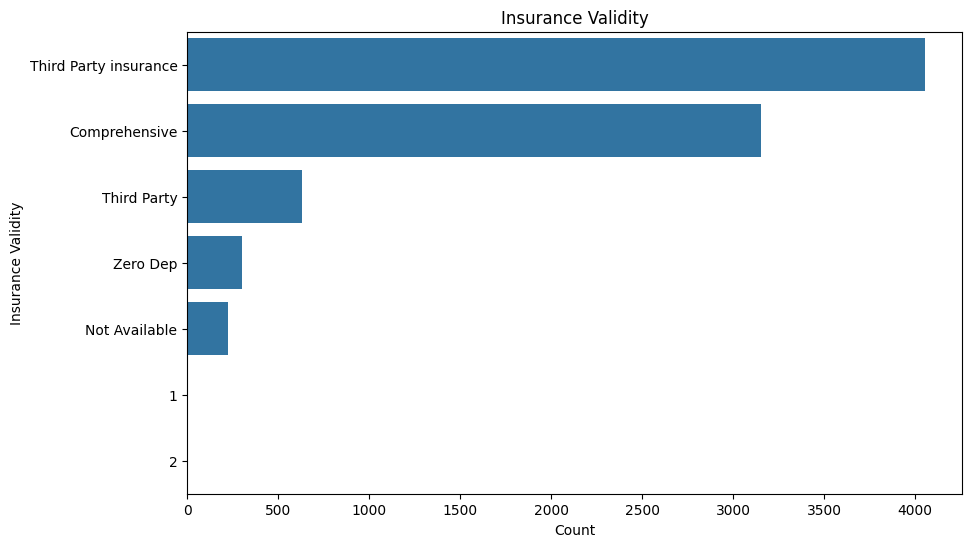

In [21]:
top_colors = df['Insurance Validity'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_colors.values, y=top_colors.index)
plt.title('Insurance Validity')
plt.xlabel('Count')
plt.ylabel('Insurance Validity')
plt.show()

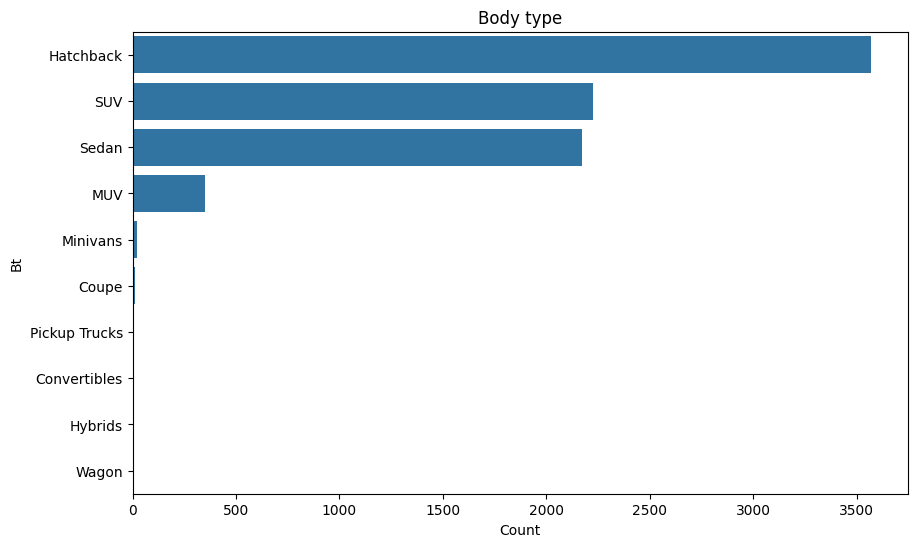

In [22]:
top_colors = df['bt'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_colors.values, y=top_colors.index)
plt.title('Body type')
plt.xlabel('Count')
plt.ylabel('Bt')
plt.show()

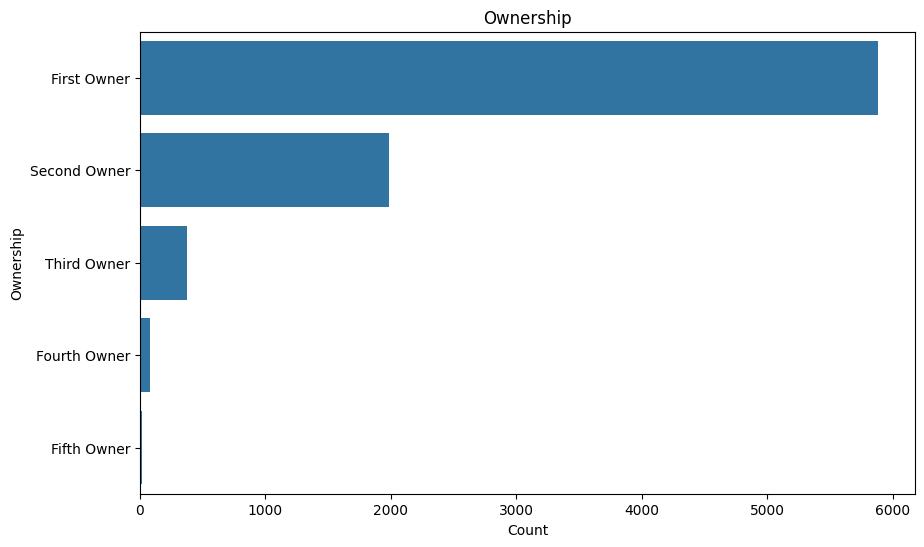

In [23]:
top_colors = df['Ownership'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_colors.values, y=top_colors.index)
plt.title('Ownership')
plt.xlabel('Count')
plt.ylabel('Ownership')
plt.show()

# Null imputation

In [24]:
df['Insurance Validity'] = df['Insurance Validity'].replace([1], np.nan)
df['Ownership'] = df['Ownership'].replace(['Fifth owner'], np.nan)
df['bt'] = df['bt'].replace(
    ['Minivans', 'Coupe', 'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'],
    np.nan
)


In [25]:
# for numerical columns
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())
df['Seats'] = df['Seats'].fillna(df['Seats'].mean())
df['price'] = df['price'].fillna(df['price'].median())

# for categorical columns
df['Ownership'].fillna(df['Ownership'].mode()[0], inplace=True)
df['Insurance Validity'].fillna(df['Insurance Validity'].mode()[0], inplace=True)
df['bt'].fillna(df['bt'].mode()[0], inplace=True)

C:\Users\Deepa\AppData\Local\Temp\ipykernel_27816\3819041069.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ownership'].fillna(df['Ownership'].mode()[0], inplace=True)
C:\Users\Deepa\AppData\Local\Temp\ipykernel_27816\3819041069.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [26]:
df

,bt,km,transmission,oem,model,modelYear,Fuel Type,Insurance Validity,Ownership,Mileage,Seats,city,price
0,Hatchback,120000,Manual,Maruti,Maruti Celerio,2015,Petrol,Third Party insurance,Third Owner,23.0,5.0,Banglore,400000.0
1,SUV,32706,Manual,Ford,Ford Ecosport,2018,Petrol,Comprehensive,Second Owner,17.0,5.0,Banglore,811000.0
2,Hatchback,11949,Manual,Tata,Tata Tiago,2018,Petrol,Comprehensive,First Owner,24.0,5.0,Banglore,585000.0
3,Sedan,17794,Manual,Hyundai,Hyundai Xcent,2014,Petrol,Comprehensive,First Owner,19.0,5.0,Banglore,462000.0
4,SUV,60000,Manual,Maruti,Maruti SX4 S Cross,2015,Diesel,Third Party insurance,First Owner,24.0,5.0,Banglore,790000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Sedan,60000,Automatic,Honda,Honda City,2019,Petrol,Third Party insurance,First Owner,18.0,5.0,delhi,900000.0
8365,SUV,20000,Manual,Kia,Kia Sonet,2021,Petrol,Third Party insurance,First Owner,18.0,5.0,delhi,950000.0
8366,Sedan,60000,Manual,Hyundai,Hyundai Verna,2011,Petrol,Third Party insurance,First Owner,17.0,5.0,delhi,418000.0
8367,SUV,38000,Manual,Hyundai,Hyundai Creta,2019,Diesel,Third Party insurance,First Owner,20.0,5.0,delhi,1195000.0


In [27]:
df.isnull().sum()

bt                    0
km                    0
transmission          0
oem                   0
model                 0
modelYear             0
Fuel Type             0
Insurance Validity    0
Ownership             0
Mileage               0
Seats                 0
city                  0
price                 0
dtype: int64

In [28]:
df.duplicated().sum()

122

In [29]:
columns = ["bt", "km",	"transmission","oem", "model",	"modelYear","price","Fuel Type","Insurance Validity","Ownership","Mileage","Seats","city"]
duplicates = df[df.duplicated(subset=columns, keep=False)]
print(duplicates)

             bt      km transmission      oem           model  modelYear  \
0     Hatchback  120000       Manual   Maruti  Maruti Celerio       2015   
13    Hatchback   48928    Automatic     Tata      Tata Tiago       2018   
78    Hatchback   60000       Manual   Maruti     Maruti Ritz       2014   
79    Hatchback   60000       Manual   Maruti     Maruti Ritz       2014   
112         SUV   20000    Automatic  Hyundai   Hyundai Venue       2019   
...         ...     ...          ...      ...             ...        ...   
8182        SUV   20000       Manual      Kia      Kia Seltos       2021   
8188        SUV   20000       Manual      Kia      Kia Seltos       2021   
8324  Hatchback   30000       Manual   Toyota   Toyota Glanza       2022   
8338      Sedan  110000       Manual   Maruti      Maruti SX4       2009   
8342      Sedan  110000       Manual   Maruti      Maruti SX4       2009   

     Fuel Type     Insurance Validity     Ownership  Mileage  Seats      city  \
0     

In [30]:
df = df.drop_duplicates(subset=columns, keep='first')
print(df.shape)

(8247, 13)


In [31]:
df

,bt,km,transmission,oem,model,modelYear,Fuel Type,Insurance Validity,Ownership,Mileage,Seats,city,price
0,Hatchback,120000,Manual,Maruti,Maruti Celerio,2015,Petrol,Third Party insurance,Third Owner,23.0,5.0,Banglore,400000.0
1,SUV,32706,Manual,Ford,Ford Ecosport,2018,Petrol,Comprehensive,Second Owner,17.0,5.0,Banglore,811000.0
2,Hatchback,11949,Manual,Tata,Tata Tiago,2018,Petrol,Comprehensive,First Owner,24.0,5.0,Banglore,585000.0
3,Sedan,17794,Manual,Hyundai,Hyundai Xcent,2014,Petrol,Comprehensive,First Owner,19.0,5.0,Banglore,462000.0
4,SUV,60000,Manual,Maruti,Maruti SX4 S Cross,2015,Diesel,Third Party insurance,First Owner,24.0,5.0,Banglore,790000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Sedan,60000,Automatic,Honda,Honda City,2019,Petrol,Third Party insurance,First Owner,18.0,5.0,delhi,900000.0
8365,SUV,20000,Manual,Kia,Kia Sonet,2021,Petrol,Third Party insurance,First Owner,18.0,5.0,delhi,950000.0
8366,Sedan,60000,Manual,Hyundai,Hyundai Verna,2011,Petrol,Third Party insurance,First Owner,17.0,5.0,delhi,418000.0
8367,SUV,38000,Manual,Hyundai,Hyundai Creta,2019,Diesel,Third Party insurance,First Owner,20.0,5.0,delhi,1195000.0


# HISTOGRAM (after removal of NaN)

C:\Users\Deepa\AppData\Local\Temp\ipykernel_27816\3049865499.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


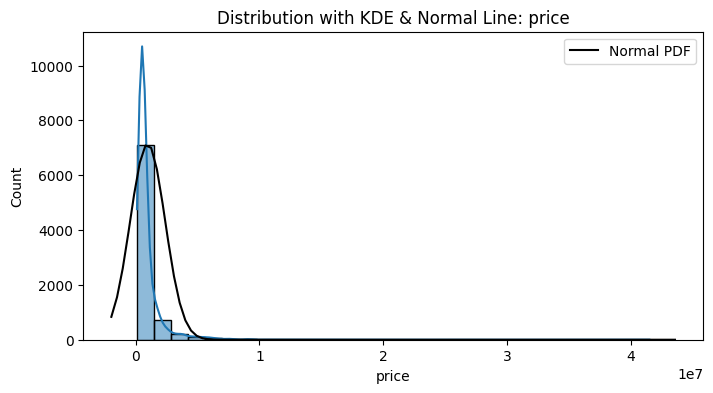

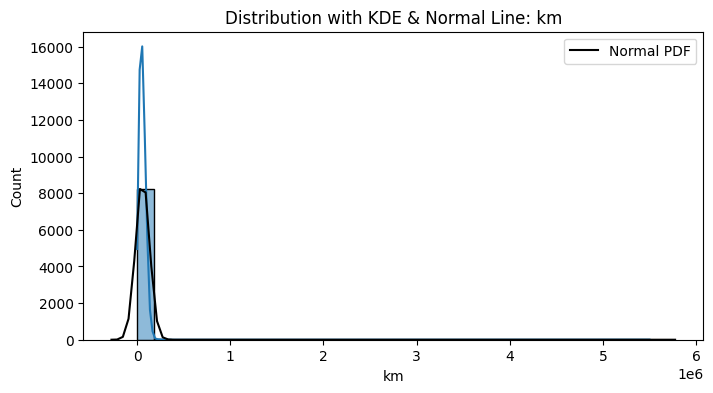

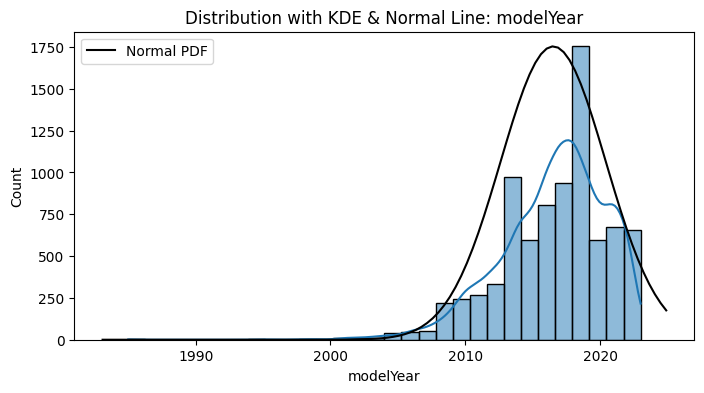

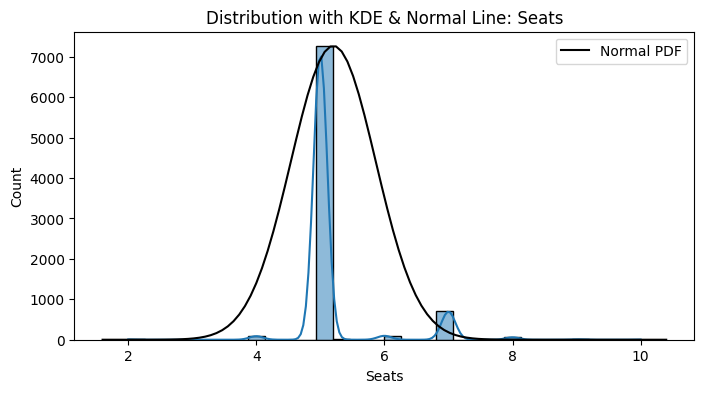

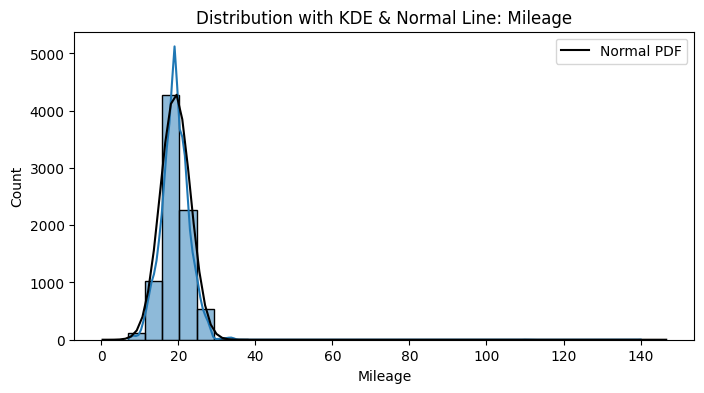

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd

numeric_cols = ["price", "km", "modelYear", "Seats", "Mileage"]

# Convert safely
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot loop
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)

    mean = df[col].mean()
    std = df[col].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)

    heights = [patch.get_height() for patch in plt.gca().patches]
    max_height = max(heights) if heights else 1
    p_scaled = p * max_height / max(p)

    plt.plot(x, p_scaled, 'black', label='Normal PDF')
    plt.title(f'Distribution with KDE & Normal Line: {col}')
    plt.legend()
    plt.show()


# Box Plot

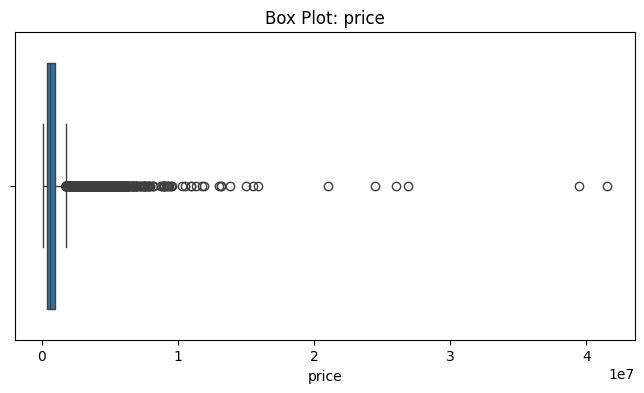

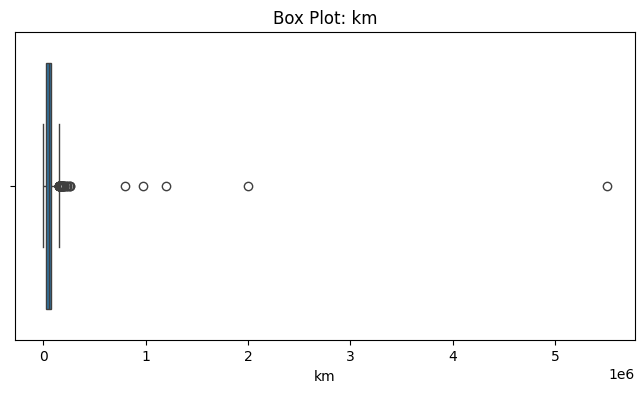

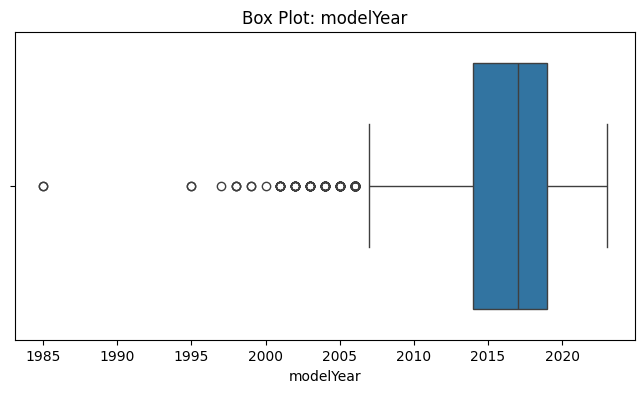

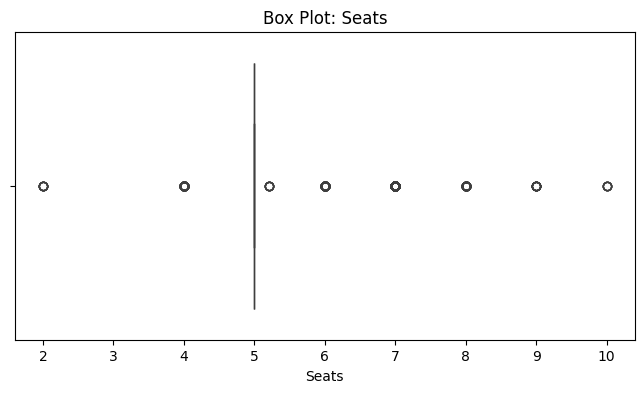

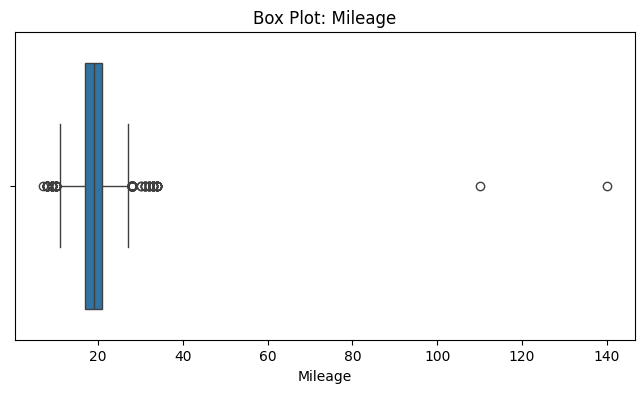

In [33]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot: {col}')
    plt.show()


# Scatter plot

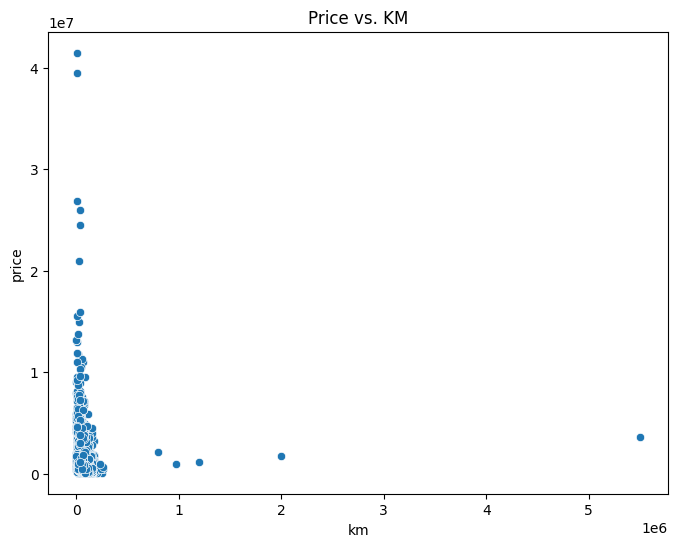

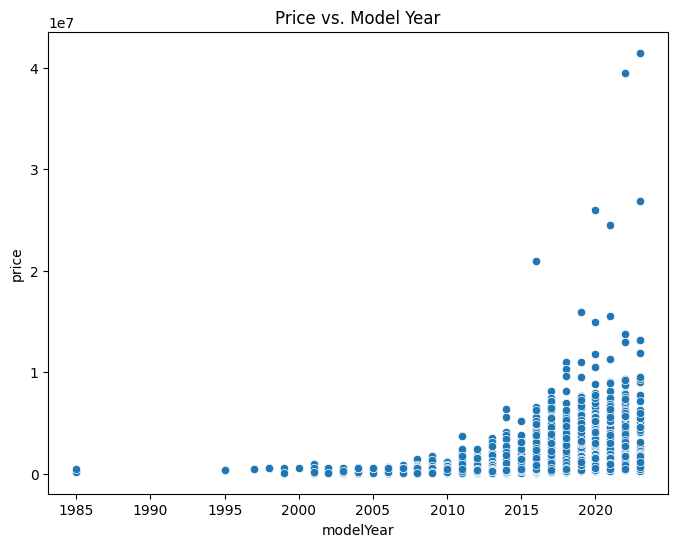

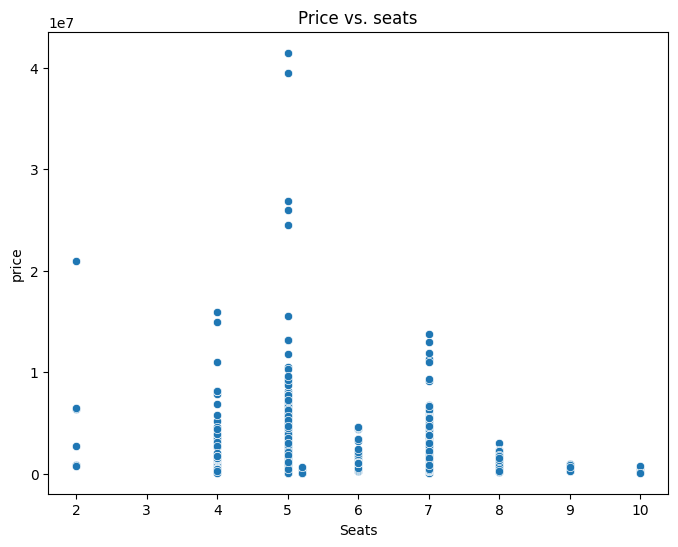

In [34]:
# Price vs. KM Driven
plt.figure(figsize=(8,6))
sns.scatterplot(x='km', y='price', data=df)
plt.title('Price vs. KM')
plt.show()

# Price vs. Model Year
plt.figure(figsize=(8,6))
sns.scatterplot(x='modelYear', y='price', data=df)
plt.title('Price vs. Model Year')
plt.show()

# Price vs. Seats
plt.figure(figsize=(8,6))
sns.scatterplot(x='Seats', y='price', data=df)
plt.title('Price vs. seats')
plt.show()

# Heatmap

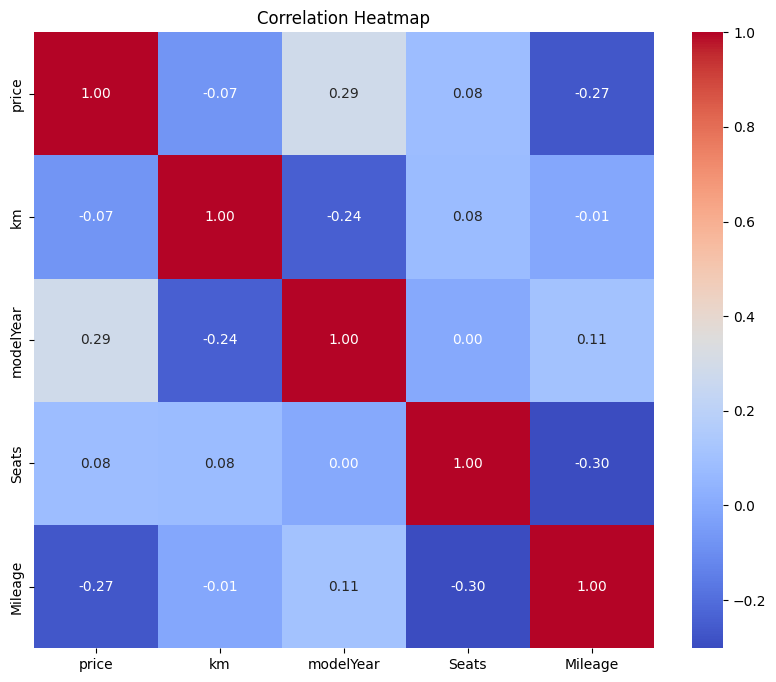

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Removal of outliers

In [36]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    conditions = []
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        conditions.append((df_clean[col] >= lower) & (df_clean[col] <= upper))
        print(f"{col}: IQR limits [{lower:.2f}, {upper:.2f}]")
    # Combine conditions
    combined = conditions[0]
    for cond in conditions[1:]:
        combined &= cond
    df_clean = df_clean[combined]
    return df_clean


In [37]:
df = remove_outliers_iqr(df, numeric_cols)
print("New shape after IQR outlier removal:", df.shape)

price: IQR limits [-410000.00, 1766000.00]
km: IQR limits [-45000.00, 155000.00]
modelYear: IQR limits [2006.50, 2026.50]
Seats: IQR limits [5.00, 5.00]
Mileage: IQR limits [11.00, 27.00]
New shape after IQR outlier removal: (6431, 13)


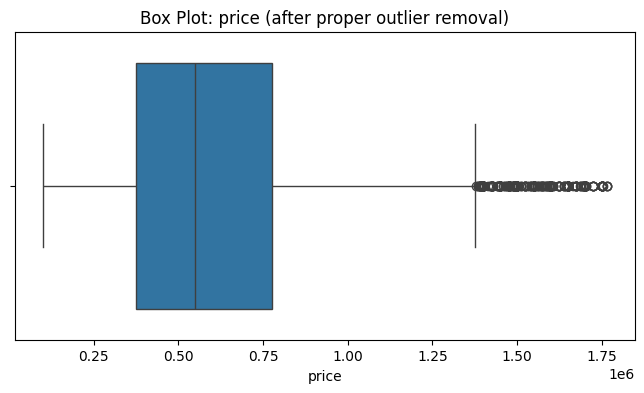

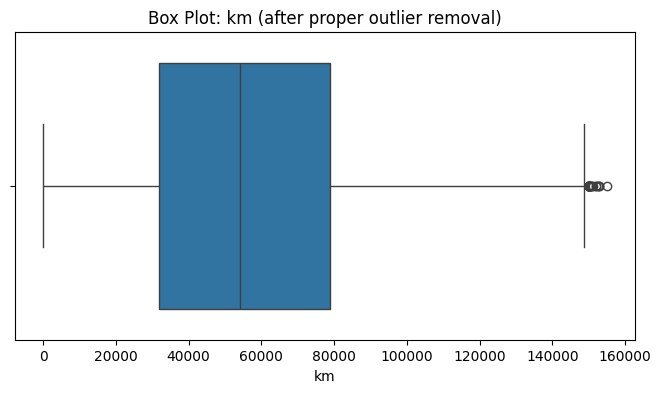

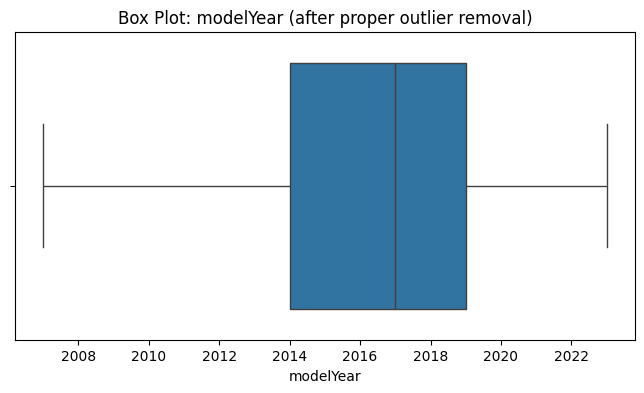

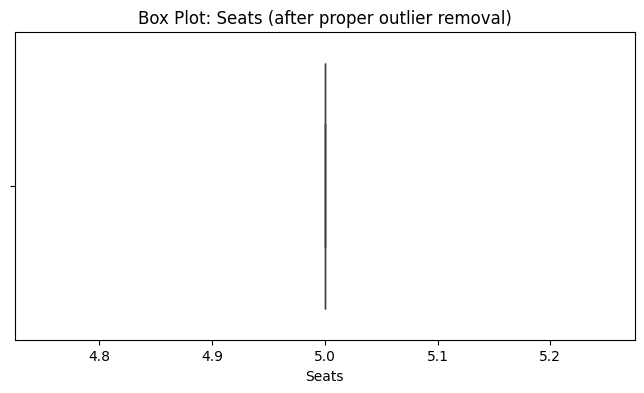

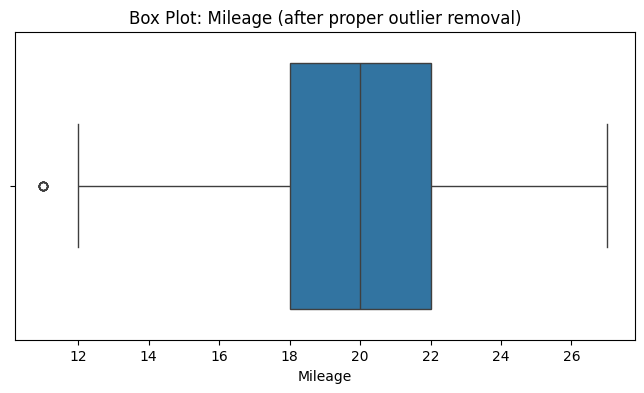

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["price", "km", "modelYear", "Seats", "Mileage"]

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot: {col} (after proper outlier removal)')
    plt.show()

In [39]:
upper_cap = df['price'].quantile(0.99)  
df['price'] = df['price'].clip(upper=upper_cap)

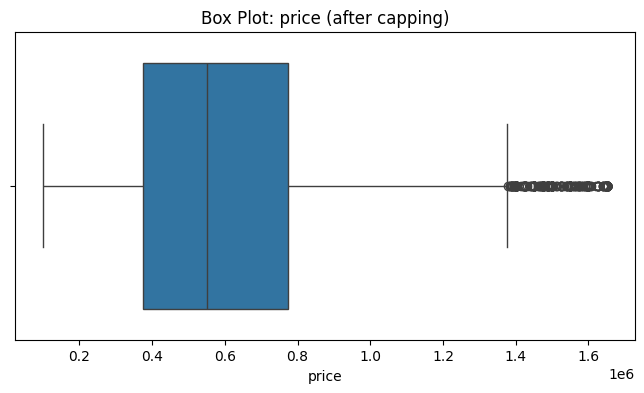

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'])
plt.title('Box Plot: price (after capping)')
plt.show()


In [41]:
import pandas as pd

# ✅ 1️⃣ Cap the price at the 99th percentile
cap_value = df['price'].quantile(0.99)
df['price'] = df['price'].clip(upper=cap_value)

print(f"Capping value used: {cap_value}")
print(f"New max price: {df['price'].max()}")

# ✅ 2️⃣ Drop the 'Seats' column
df_final = df.drop(columns=['Seats'])

# ✅ 3️⃣ Check final DataFrame
print(df_final.head())
print(df_final.info())

# ✅ 4️⃣ Save to new file (optional)
df_final.to_excel('cleaned_final_data.xlsx', index=False)

Capping value used: 1650000.0
New max price: 1650000.0
          bt      km transmission      oem               model  modelYear  \
0  Hatchback  120000       Manual   Maruti      Maruti Celerio       2015   
1        SUV   32706       Manual     Ford       Ford Ecosport       2018   
2  Hatchback   11949       Manual     Tata          Tata Tiago       2018   
3      Sedan   17794       Manual  Hyundai       Hyundai Xcent       2014   
4        SUV   60000       Manual   Maruti  Maruti SX4 S Cross       2015   

  Fuel Type     Insurance Validity     Ownership  Mileage      city     price  
0    Petrol  Third Party insurance   Third Owner     23.0  Banglore  400000.0  
1    Petrol          Comprehensive  Second Owner     17.0  Banglore  811000.0  
2    Petrol          Comprehensive   First Owner     24.0  Banglore  585000.0  
3    Petrol          Comprehensive   First Owner     19.0  Banglore  462000.0  
4    Diesel  Third Party insurance   First Owner     24.0  Banglore  790000.0  
<c

In [42]:
df = pd.read_excel("cleaned_final_data.xlsx")

In [179]:
df

,bt,km,transmission,oem,model,modelYear,Fuel Type,Insurance Validity,Ownership,Mileage,city,price
0,Hatchback,120000,Manual,Maruti,Maruti Celerio,2015,Petrol,Third Party insurance,Third Owner,23.0,Banglore,400000.0
1,SUV,32706,Manual,Ford,Ford Ecosport,2018,Petrol,Comprehensive,Second Owner,17.0,Banglore,811000.0
2,Hatchback,11949,Manual,Tata,Tata Tiago,2018,Petrol,Comprehensive,First Owner,24.0,Banglore,585000.0
3,Sedan,17794,Manual,Hyundai,Hyundai Xcent,2014,Petrol,Comprehensive,First Owner,19.0,Banglore,462000.0
4,SUV,60000,Manual,Maruti,Maruti SX4 S Cross,2015,Diesel,Third Party insurance,First Owner,24.0,Banglore,790000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6460,Hatchback,80000,Manual,Maruti,Maruti Wagon R,2009,Petrol,Third Party insurance,Second Owner,19.0,delhi,100000.0
6461,Sedan,60000,Automatic,Honda,Honda City,2019,Petrol,Third Party insurance,First Owner,18.0,delhi,900000.0
6462,SUV,20000,Manual,Kia,Kia Sonet,2021,Petrol,Third Party insurance,First Owner,18.0,delhi,950000.0
6463,Sedan,60000,Manual,Hyundai,Hyundai Verna,2011,Petrol,Third Party insurance,First Owner,17.0,delhi,418000.0


# Encoding 

In [180]:
from sklearn.preprocessing import OneHotEncoder

# Categorical columns
cat_cols = ['bt', 'transmission', 'oem', 'model',
            'Fuel Type', 'Insurance Validity', 'Ownership', 'city']

# Use correct param for your version
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # for sklearn >= 1.2

# Fit and transform
encoded_cats = encoder.fit_transform(df[cat_cols])

# Get encoded column names
encoded_cat_cols = encoder.get_feature_names_out(cat_cols)


encoded_df = pd.DataFrame(encoded_cats, columns=encoded_cat_cols, index=df.index)

# Combine
df_encoded = df.drop(columns=cat_cols).join(encoded_df)


In [181]:
df_encoded 

,km,modelYear,Mileage,price,bt_Hatchback,bt_SUV,bt_Sedan,transmission_Automatic,transmission_Manual,oem_Audi,...,Ownership_First Owner,Ownership_Fourth Owner,Ownership_Second Owner,Ownership_Third Owner,city_Banglore,city_Chennai,city_delhi,city_hyderabad,city_jaipur,city_kolkata
0,120000,2015,23.0,400000.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,32706,2018,17.0,811000.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,11949,2018,24.0,585000.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,17794,2014,19.0,462000.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60000,2015,24.0,790000.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6460,80000,2009,19.0,100000.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6461,60000,2019,18.0,900000.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6462,20000,2021,18.0,950000.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6463,60000,2011,17.0,418000.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [182]:
# Save to Excel
df_encoded.to_excel('encoded_data.xlsx', index=False)

In [183]:
import pickle

with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


# Normalising

In [184]:
df = pd.read_excel("encoded_data.xlsx")

In [185]:
df

,km,modelYear,Mileage,price,bt_Hatchback,bt_SUV,bt_Sedan,transmission_Automatic,transmission_Manual,oem_Audi,...,Ownership_First Owner,Ownership_Fourth Owner,Ownership_Second Owner,Ownership_Third Owner,city_Banglore,city_Chennai,city_delhi,city_hyderabad,city_jaipur,city_kolkata
0,120000,2015,23.0,400000.0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1,32706,2018,17.0,811000.0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,11949,2018,24.0,585000.0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,17794,2014,19.0,462000.0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,60000,2015,24.0,790000.0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6460,80000,2009,19.0,100000.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
6461,60000,2019,18.0,900000.0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
6462,20000,2021,18.0,950000.0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
6463,60000,2011,17.0,418000.0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [186]:
df = df_encoded

In [187]:
df

,km,modelYear,Mileage,price,bt_Hatchback,bt_SUV,bt_Sedan,transmission_Automatic,transmission_Manual,oem_Audi,...,Ownership_First Owner,Ownership_Fourth Owner,Ownership_Second Owner,Ownership_Third Owner,city_Banglore,city_Chennai,city_delhi,city_hyderabad,city_jaipur,city_kolkata
0,120000,2015,23.0,400000.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,32706,2018,17.0,811000.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,11949,2018,24.0,585000.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,17794,2014,19.0,462000.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60000,2015,24.0,790000.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6460,80000,2009,19.0,100000.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6461,60000,2019,18.0,900000.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6462,20000,2021,18.0,950000.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6463,60000,2011,17.0,418000.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [188]:
print(df.head())
print(df.info())
print(df.select_dtypes(exclude='number').columns)

       km  modelYear  Mileage     price  bt_Hatchback  bt_SUV  bt_Sedan  \
0  120000       2015     23.0  400000.0           1.0     0.0       0.0   
1   32706       2018     17.0  811000.0           0.0     1.0       0.0   
2   11949       2018     24.0  585000.0           1.0     0.0       0.0   
3   17794       2014     19.0  462000.0           0.0     0.0       1.0   
4   60000       2015     24.0  790000.0           0.0     1.0       0.0   

   transmission_Automatic  transmission_Manual  oem_Audi  ...  \
0                     0.0                  1.0       0.0  ...   
1                     0.0                  1.0       0.0  ...   
2                     0.0                  1.0       0.0  ...   
3                     0.0                  1.0       0.0  ...   
4                     0.0                  1.0       0.0  ...   

   Ownership_First Owner  Ownership_Fourth Owner  Ownership_Second Owner  \
0                    0.0                     0.0                     0.0   
1     

In [189]:
from sklearn.preprocessing import MinMaxScaler

# Choose your real numeric columns (except target)
num_cols = ['km', 'modelYear', 'Mileage']  # adjust if needed

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Optional: Save scaler
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

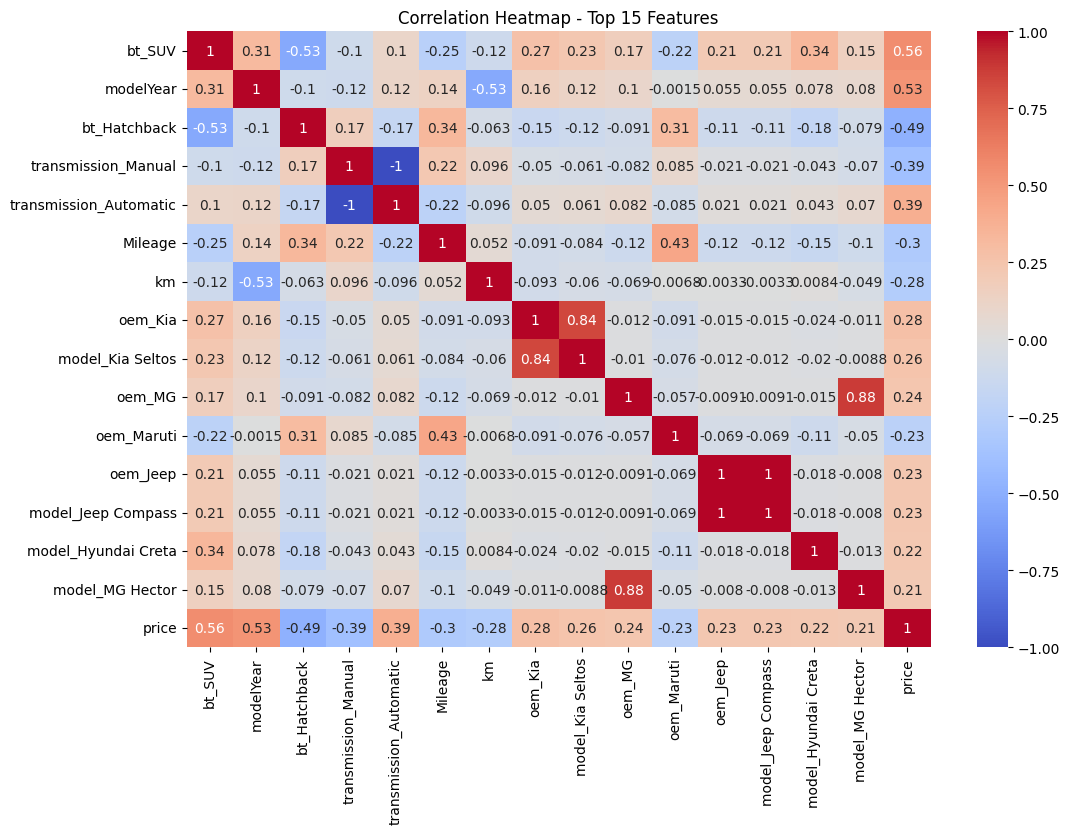

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df.corr()

# Top 15 most correlated features with target
corr_target = corr['price'].drop('price').abs().sort_values(ascending=False)
top_features = corr_target.head(15).index

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[top_features.tolist() + ['price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Top 15 Features')
plt.show()


In [191]:
df = pd.read_excel("encoded_data.xlsx")

In [192]:
df

,km,modelYear,Mileage,price,bt_Hatchback,bt_SUV,bt_Sedan,transmission_Automatic,transmission_Manual,oem_Audi,...,Ownership_First Owner,Ownership_Fourth Owner,Ownership_Second Owner,Ownership_Third Owner,city_Banglore,city_Chennai,city_delhi,city_hyderabad,city_jaipur,city_kolkata
0,120000,2015,23.0,400000.0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1,32706,2018,17.0,811000.0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,11949,2018,24.0,585000.0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,17794,2014,19.0,462000.0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,60000,2015,24.0,790000.0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6460,80000,2009,19.0,100000.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
6461,60000,2019,18.0,900000.0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
6462,20000,2021,18.0,950000.0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
6463,60000,2011,17.0,418000.0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [193]:
from sklearn.model_selection import train_test_split

# Your final DataFrame with selected features
# ✅ We assume df is already your final encoded + selected columns
X = df.drop(columns=['price'])
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(5172, 238) (1293, 238)


In [194]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ['km', 'modelYear', 'Mileage']  # adjust if needed

scaler = MinMaxScaler()

# Fit only on training
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transform test with same scaler
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Linear Regression

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize and fit
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Linear Regression Test R²: {r2:.4f}")
print(f"Linear Regression Test MAE: {mae:,.2f}")
print(f"Linear Regression Test MSE: {mse:,.2f}")
print(f"Linear Regression Test RMSE: {rmse:,.2f}")

# Cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R²: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Linear Regression Test R²: -15669568447368503754752.0000
Linear Regression Test MAE: 1,366,026,113,575,565.00
Linear Regression Test MSE: 1,825,796,653,910,828,857,323,412,418,199,552.00
Linear Regression Test RMSE: 42,729,341,838,025,408.00
Cross-Validation R² Scores: [-1.56206578e+22 -4.63956628e+20 -5.16330142e+20 -3.28376606e+21
 -4.49265757e+22]
Mean CV R²: -12962257262122597613568.0000
Standard Deviation: 16932610881863601356800.0000


# Random forest 

In [196]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [197]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Random Forest Test R²: {r2:.4f}")
print(f"Random Forest Test MAE: {mae:,.2f}")
print(f"Random Forest Test MSE: {mse:,.2f}")
print(f"Random Forest Test RMSE: {rmse:,.2f}")

Random Forest Test R²: 0.8926
Random Forest Test MAE: 72,161.17
Random Forest Test MSE: 12,516,631,677.96
Random Forest Test RMSE: 111,877.75


In [198]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R²: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Cross-Validation R² Scores: [0.85343988 0.85550881 0.83061321 0.86678513 0.86016946]
Mean CV R²: 0.8533
Standard Deviation: 0.0122


# Decision Trees

In [199]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize and fit
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Decision Tree Test R²: {r2:.4f}")
print(f"Decision Tree Test MAE: {mae:,.2f}")
print(f"Decision Tree Test MSE: {mse:,.2f}")
print(f"Decision Tree Test RMSE: {rmse:,.2f}")

# Cross-validation
cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R²: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Decision Tree Test R²: 0.8001
Decision Tree Test MAE: 95,196.41
Decision Tree Test MSE: 23,297,807,399.59
Decision Tree Test RMSE: 152,636.19
Cross-Validation R² Scores: [0.75921596 0.72839198 0.70605647 0.71241663 0.74661519]
Mean CV R²: 0.7305
Standard Deviation: 0.0201


# Gradient Boosting

In [200]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize and fit
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Predict
y_pred = gb.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Gradient Boosting Test R²: {r2:.4f}")
print(f"Gradient Boosting Test MAE: {mae:,.2f}")
print(f"Gradient Boosting Test MSE: {mse:,.2f}")
print(f"Gradient Boosting Test RMSE: {rmse:,.2f}")

# Cross-validation
cv_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R²: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Gradient Boosting Test R²: 0.8271
Gradient Boosting Test MAE: 101,423.22
Gradient Boosting Test MSE: 20,148,546,872.73
Gradient Boosting Test RMSE: 141,945.58
Cross-Validation R² Scores: [0.79351596 0.80389294 0.78845346 0.82758569 0.80381292]
Mean CV R²: 0.8035
Standard Deviation: 0.0135


# Random searchCV

In [201]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1️⃣ Split
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2️⃣ Scale numeric columns
num_cols = ['km', 'modelYear', 'Mileage']  # adjust for your data

scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 3️⃣ Define Random Forest and param distributions
rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# 4️⃣ Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Try 20 random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# 5️⃣ Fit search
random_search.fit(X_train, y_train)

print(f"Best Params: {random_search.best_params_}")
print(f"Best CV R²: {random_search.best_score_:.4f}")

# 6️⃣ Evaluate best model on test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test R²: {r2:.4f}")
print(f"Test MAE: {mae:,.2f}")
print(f"Test MSE: {mse:,.2f}")
print(f"Test RMSE: {rmse:,.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best CV R²: 0.8186
Test R²: 0.8540
Test MAE: 89,147.57
Test MSE: 17,008,966,678.55
Test RMSE: 130,418.43


# Grid Search

In [202]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1️⃣ Split
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2️⃣ Scale numeric columns
num_cols = ['km', 'modelYear', 'Mileage']  # adjust for your data

scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 3️⃣ Define Random Forest and param grid
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],          # Keep grid reasonable to avoid long runtime
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# 4️⃣ Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# 5️⃣ Fit search
grid_search.fit(X_train, y_train)

print(f"Best Params: {grid_search.best_params_}")
print(f"Best CV R²: {grid_search.best_score_:.4f}")

# 6️⃣ Evaluate best model on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test R²: {r2:.4f}")
print(f"Test MAE: {mae:,.2f}")
print(f"Test MSE: {mse:,.2f}")
print(f"Test RMSE: {rmse:,.2f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R²: 0.8417
Test R²: 0.8716
Test MAE: 80,317.79
Test MSE: 14,960,194,136.71
Test RMSE: 122,311.87


In [203]:
import pickle

# ✅ Your final best estimator
best_rf = grid_search.best_estimator_

# ✅ Save it properly
with open('random_forest_gridsearch_final.pkl', 'wb') as f:
    pickle.dump(best_rf, f)


In [204]:
import pickle

# ✅ Correct: this is your final trained model
best_rf = grid_search.best_estimator_

# Save model
with open('random_forest_gridsearch_final', 'wb') as f:
    pickle.dump(best_rf, f)

# Save your final feature order
final_feature_order = list(X.columns)
with open('model_columns.pkl', 'wb') as f:
    pickle.dump(final_feature_order, f)

# Save encoder + scaler (if you actually have them)
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [205]:
import pickle

# ✅ This is the best model found by RandomizedSearchCV
best_rf = random_search.best_estimator_

# Save it to a pickle file
with open('random_forest_final.pkl', 'wb') as f:
    pickle.dump(best_rf, f)
